## Open source real time voice chat
In this notebook, I will be exploring Kyutai's Moshi model, which is the first open-source model that enables users to interact with a language model in real-time using voice, similar to the widely popular demo from OpenAI showcasing live voice capabilities but the only difference is that moshi is fully open source. The model requires approximately 23 GB of VRAM, so unfortunately, it can only be run on the paid version of Google Colab.

But on the flip side the KyutAI team have made it very simple to run the model and it only takes one line of code to start a server that hosts the model and the GUI for interactive use. The session can also be recorded for demo purposes.

Another thing to consider for this notebook is that I will be using the tunnel feature from gradio which will setup a tunnel with a URL accessible from anywhere, but this tunnel goes through US and can add significant latency. This will not be a problem if the model is hosted locally.

The github repo for the model is here: [Kyutai-github-repo](https://github.com/kyutai-labs/moshi)

## Installing dependencies

In [1]:
!pip install --upgrade torch
!pip install triton

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 MB 4.7 MB/s eta 0:00:00


In [2]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 13.3 MB/s eta 0:00:00


The model can be directly installed using the pip command below which makes it very convenient to get started.

In [3]:
!pip install moshi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 16.9 MB/s eta 0:00:00
  Created wheel for moshi: filename=moshi-0.1.0-py3-none-any.whl size=58260 sha256=27fa11b7fb8740bd9a9aaab68da7b108dbce5ace507a2ca107acfca542fac08e
  Stored in directory: /root/.cache/pip/wheels/1f/a7/98/541e8598f80983987d281d6e950e7966076f1a1d77083f0dce
Successfully built moshi
  Attempting uninstall: einops
    Found existing installation: einops 0.8.0
    Uninstalling einops-0.8.0:
      Successfully uninstalled einops-0.8.0


## Running the model
The server with the gui and the model can be hosted using just one line of code in the following cell. Running this cell will give you a url which leads to a pre built website as shown below where users can speak and interact with moshi in real time.

In [4]:
!python -m moshi.server --gradio-tunnel --hf-repo kyutai/moshika-pytorch-bf16

[Info] loading mimi
(…)nizer-e351c8d8-checkpoint125.safetensors: 100% 385M/385M [00:01<00:00, 366MB/s]
[Info] mimi loaded
tokenizer_spm_32k_3.model: 100% 553k/553k [00:00<00:00, 401MB/s]
[Info] loading moshi
model.safetensors: 100% 15.4G/15.4G [00:50<00:00, 307MB/s]
[Info] moshi loaded
[Info] warming up the model
[Info] retrieving the static content
dist.tgz: 100% 589k/589k [00:00<00:00, 317MB/s]
[Info] serving static content from /root/.cache/huggingface/hub/models--kyutai--moshi-artifacts/snapshots/8481e95f73827e4e70ac7311c12b0be099276182/dist
[Info] Access the Web UI directly at http://localhost:8998
[Info] Tunnel started, if executing on a remote GPU, you can use https://3fb99b053fdfedb2ba.gradio.live.
[Info] Note that this tunnel goes through the US and you might experience high latency in Europe.
======== Running on http://0.0.0.0:8998 ========
(Press CTRL+C to quit)
[Info] accepted connection
[Info] frame handled in 11.7ms
[Info] frame handled in 84.1ms
[Info] frame handled in 8

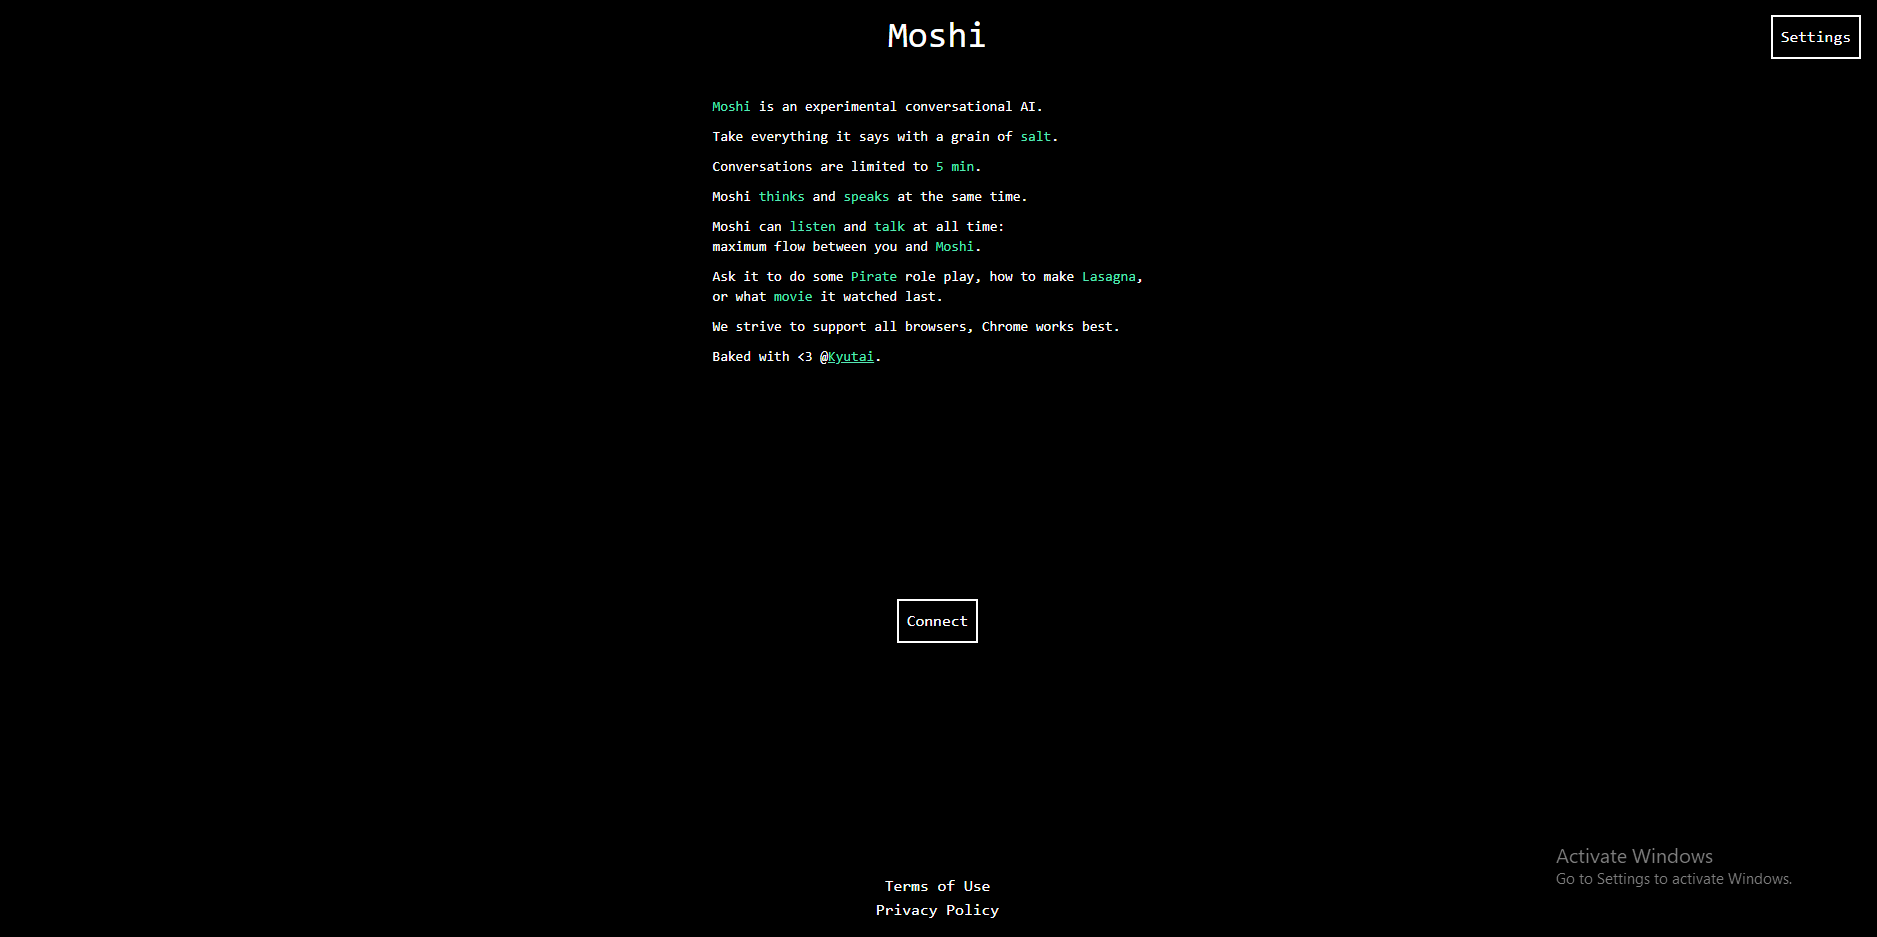